In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = sns.load_dataset('titanic')

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.shape

(891, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
df.isna().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

<Axes: ylabel='age'>

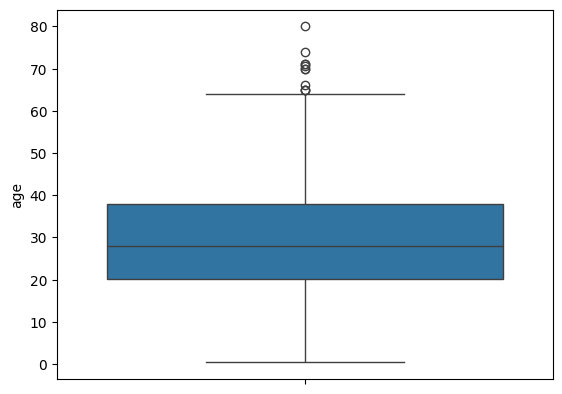

In [ ]:
sns.boxplot(y=df['age'],data = df)

In [ ]:
df['age'] = df['age'].fillna(df['age'].median())

In [ ]:
#Drop the unnecessary columns
df = df.drop(columns = ['alive','class', 'deck', 'embarked','adult_male'])

In [ ]:
df['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

In [ ]:
df['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown'], dtype=object)

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,Southampton,True


In [ ]:
df.isna().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
who,0
embark_town,0
alone,0


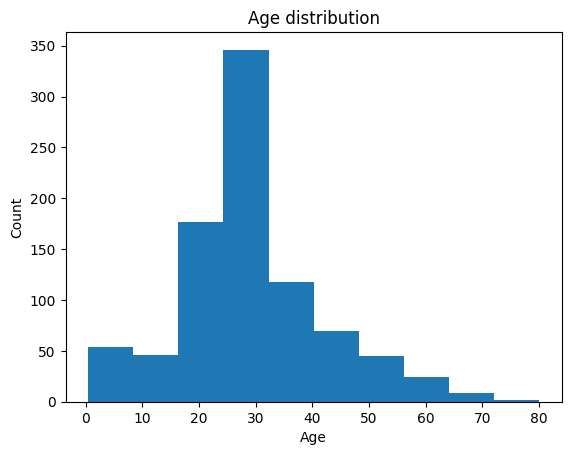

In [ ]:
plt.hist(df['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution')
plt.show()

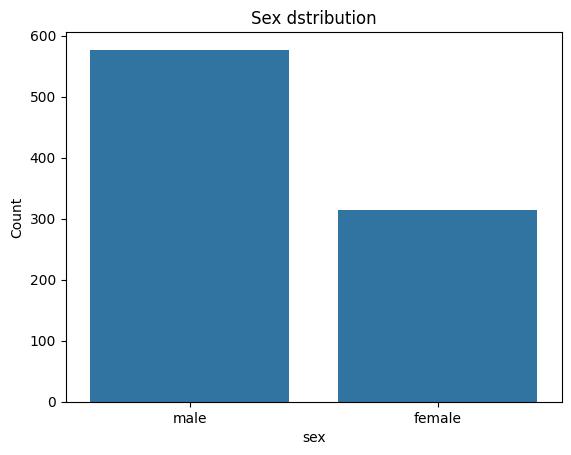

In [ ]:
sns.countplot(data = df, x= 'sex')
plt.xlabel('sex')
plt.ylabel('Count')
plt.title('Sex dstribution')
plt.show()

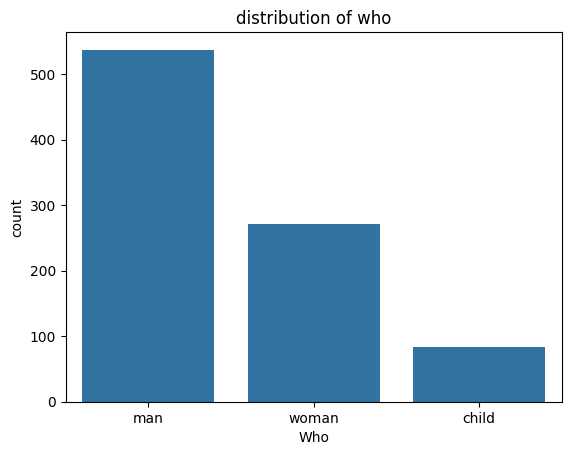

In [ ]:
sns.countplot(x='who',data = df)
plt.xlabel('Who')
plt.ylabel('count')
plt.title('distribution of who')
plt.show()

In [ ]:
#Encoding
df = pd.get_dummies(df,columns = ['sex','who','embark_town','alone'],dtype = int,drop_first =True)

In [ ]:
df.head()

,survived,pclass,age,sibsp,parch,fare,sex_male,who_man,who_woman,embark_town_Queenstown,embark_town_Southampton,alone_True
0,0,3,22.0,1,0,7.2500,1,1,0,0,1,0
1,1,1,38.0,1,0,71.2833,0,0,1,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,1,0
4,0,3,35.0,0,0,8.0500,1,1,0,0,1,1


In [ ]:
X = df.drop(columns = ['survived'])
y = df['survived']

In [ ]:
X.head()

,pclass,age,sibsp,parch,fare,sex_male,who_man,who_woman,embark_town_Queenstown,embark_town_Southampton,alone_True
0,3,22.0,1,0,7.2500,1,1,0,0,1,0
1,1,38.0,1,0,71.2833,0,0,1,0,0,0
2,3,26.0,0,0,7.9250,0,0,1,0,1,1
3,1,35.0,1,0,53.1000,0,0,1,0,1,0
4,3,35.0,0,0,8.0500,1,1,0,0,1,1


In [ ]:
#scaling
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_values = scaler.fit_transform(X)

In [ ]:
X = pd.DataFrame(scaled_values,columns = X.columns)

In [ ]:
X.head()

,pclass,age,sibsp,parch,fare,sex_male,who_man,who_woman,embark_town_Queenstown,embark_town_Southampton,alone_True
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.737695,0.811922,-0.661133,-0.307562,0.615838,-1.231645
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,-1.355574,-1.231645,1.512555,-0.307562,-1.623803,-1.231645
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,-1.355574,-1.231645,1.512555,-0.307562,0.615838,0.811922
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,-1.355574,-1.231645,1.512555,-0.307562,0.615838,-1.231645
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.737695,0.811922,-0.661133,-0.307562,0.615838,0.811922
